# Homework 2

Course: Machine Learning 


Malihe Ghazalian


student number: 830402056

# Regression 

import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

Read Dataset Weather in Szeged 2006-2016

In [2]:
weather = pd.read_excel("weatherHistory.xlsx")
data = pd.DataFrame(weather)

In [3]:
data.shape

(96453, 12)

# Pre-processing Data

In [4]:
print("sum of Nan values: ",data.isna().sum())
print("data frame with Nan shape: ",data[data.isna().any(axis=1)].shape)

sum of Nan values:  Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
data frame with Nan shape:  (517, 12)


Now the Nan values will be removed:


In [5]:
data = data.dropna()
data.isna().sum()
print("data frame with Nan shape: ",data[data.isna().any(axis=1)].shape)

data frame with Nan shape:  (0, 12)


###### remove unnecessary columns

In [6]:
data = data.drop(columns=["Formatted Date", "Summary", "Precip Type", "Loud Cover", "Daily Summary"], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           95936 non-null  float64
 1   Apparent Temperature (C)  95936 non-null  float64
 2   Humidity                  95936 non-null  float64
 3   Wind Speed (km/h)         95936 non-null  float64
 4   Wind Bearing (degrees)    95936 non-null  int64  
 5   Visibility (km)           95936 non-null  float64
 6   Pressure (millibars)      95936 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.9 MB


# Data Descriptions

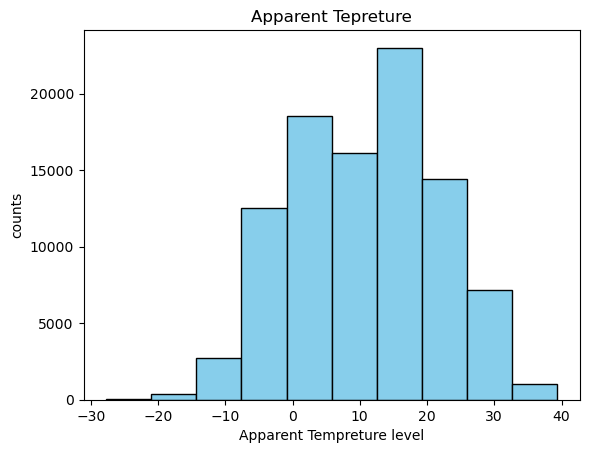

In [28]:
#Apparent Temperature (C)
plt.hist(data['Apparent Temperature (C)'], bins=10, edgecolor='k', color='skyblue')
plt.xlabel("Apparent Tempreture level")
plt.ylabel("counts")
plt.title("Apparent Tepreture")
plt.show()

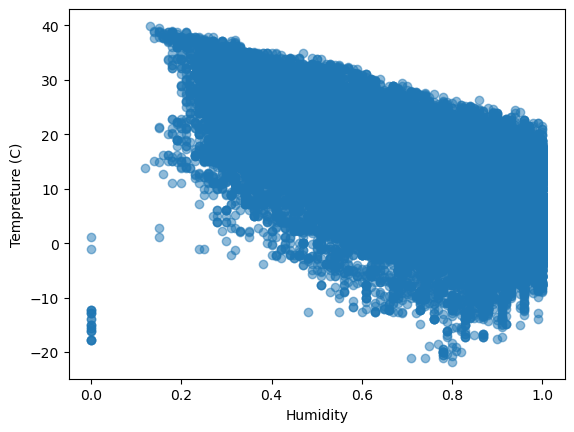

In [29]:
#scatter humidity vs tempreture
plt.scatter(data['Humidity'], data['Temperature (C)'], alpha=0.5)
plt.xlabel("Humidity")
plt.ylabel("Tempreture (C)")
plt.show()

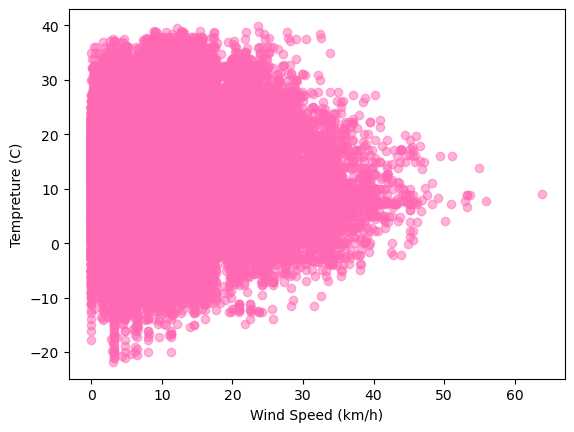

In [30]:
#scatter Wind Speed (km/h) vs tempreture
plt.scatter(data['Wind Speed (km/h)'], data['Temperature (C)'], color='hotpink', alpha=0.5)
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Tempreture (C)")
plt.show()

# Split data to test and trainig sets

use 80 percent of the data for training and 20 percent for test of the model

In [8]:
# Define the percentage of data to use for training (80%)
train_percentage = 0.8
# Convert the DataFrame to an array to use shuffle method
data_array = data.values

# Calculate the number of samples for training and testing
samples = len(data_array)
train_data_counts = int(train_percentage * samples)
test_data_counts = samples - train_data_counts

# Shuffle the data array randomly
np.random.shuffle(data_array)

In [9]:
#identify X -> (matrix of features and data) and y -> (vector of lables)
X = data.iloc[:, 1:7]
y = data.iloc[:, 0]

In [10]:
X_array = X.values
y_array = y.values

# Calculate X_train, X_test, y_train, y_test
X_train = X_array[:train_data_counts]
X_test = X_array[train_data_counts:]

y_train = y_array[:train_data_counts]
y_test = y_array[train_data_counts:]

###### add a constant 1 column to the features matrix for the bias term

Add a constant 1 column to the features matrix for the bias term

First add column of 1's to X_train for bias term

In [11]:
column_of_1s = np.ones((X_train.shape[0], 1))
bias_X = np.c_[column_of_1s, X_train]

Then add column of 1's to X_train for bias term

In [12]:
column_of_1s = np.ones((X_test.shape[0], 1))
X_test_bias = np.c_[column_of_1s, X_test]

# Linear Regression:

Implement a direct approach (normal equations) to obtain the linear regression solution

###### Define linear regression function using normal equation

In [13]:
#Define linear regression function
def linear_regression(X, y):
    #Normal equation
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    return w

###### Calculate linear regression weights and running time

In [14]:
#save start time
start = time.time()

#Calculate linear regression weight using normal equation
W = linear_regression(bias_X, y_train)

end = time.time()

running_time = end - start

print("Linear regression weights from normal equation: ", W)
print("\nrunning time:", running_time, "Seconds")

Linear regression weights from normal equation:  [ 2.78843636e+00  8.72633993e-01 -1.45856351e+00  8.32898477e-02
 -4.01082106e-04  7.69563161e-03 -1.63716378e-04]

running time: 0.05202078819274902 Seconds


### Make a prediction on test data

###### predict y on test data (X_test)

In [15]:
predicted_y = X_test_bias.dot(W)

###### Define Test Error --> mean squared error

In [16]:
Error = np.mean((predicted_y - y_test) ** 2)

In [17]:
print("Model Error = ", Error)

Model Error =  0.7679491939095997


# Gradient Descent for linear regression: 

In [56]:
#Define gradient function:
def gradient(x, y, w):
    # Compute predictions
    yhat = np.dot(x, w)
    # Compute gradients 
    gradients = np.dot(x.T, yhat - y)       
    
    return gradients

In [54]:
#definr Gradient Descent:
def mini_batch_linear_regression(X, y, batch_size, lr, number_epoches):
    N, D = X.shape
    w = np.zeros((D, 1))
    g = np.inf
    
    # Main optimization loop
    for epoch in range(number_epoches):
        # Shuffle the data for each epoch (optional but can improve convergence)
        indices = np.random.permutation(len(X))
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Mini-batch SGD
        for i in range(0, len(X_shuffled), batch_size):
            # Extract mini-batch
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            # Compute gradient using the mini-batch
            grad = gradient(X_batch, y_batch, w)

            # Update weights using the gradient and learning rate
            w = w - lr * grad
    return w
        

In [105]:
def mini_batch_SGD(X, y, batch_size, number_epoches, lr=0.01):
    N, D = X.shape
    w = np.zeros((D, 1))
    indices = np.random.permutation(len(X))
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    g = np.inf
    for i in range(0, N, batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]
        lr = 1 / batch_size
        yhat = np.dot(X_batch, w)
        if(len(yhat) < batch_size):
            break
        if np.linalg.norm(g) > 1e-5:
            g = np.dot(X_batch.T, yhat - y_batch)
            w = w - lr *g
        return w

In [134]:
X = bias_X
y = y_train.reshape(len(y_train) , 1)
y_test = y_test.to_numpy()
ytest = y_test.reshape(len(y_test), 1)
batch_sizes = [10, 20, 30, 40, 50, 100]
Weights = []
Errors = []
for batch_size in batch_sizes:
    w = mini_batch_SGD(X, y, batch_size, 100)
    Weights.append(w)
    predicted_y = X_test_bias.dot(w)
    mse = np.sum((y_test - predicted_y) ** 2)/2*len(y_test)
    Errors.append(Error)

(19188,)


In [135]:
print("Weights: ", Weights)
print("\nErrors: ", Errors)

Weights:  [array([[9.37666667e+00],
       [1.45789429e+02],
       [6.73936111e+00],
       [1.18664352e+02],
       [2.01493722e+03],
       [1.09841096e+02],
       [9.52469109e+03]]), array([[1.40375000e+01],
       [3.04542231e+02],
       [9.19003056e+00],
       [1.50826437e+02],
       [2.96345472e+03],
       [1.59130960e+02],
       [1.42664338e+04]]), array([[1.35648148e+01],
       [2.69666385e+02],
       [8.72025926e+00],
       [1.53298693e+02],
       [2.88008704e+03],
       [1.62992393e+02],
       [1.37018882e+04]]), array([[1.27920833e+01],
       [2.69444454e+02],
       [7.64377361e+00],
       [1.42228236e+02],
       [2.92681208e+03],
       [1.48608501e+02],
       [1.29617724e+04]]), array([[1.19773333e+01],
       [2.27421873e+02],
       [7.57057444e+00],
       [1.44618726e+02],
       [2.33286011e+03],
       [1.31110835e+02],
       [1.21569297e+04]]), array([[1.38330000e+01],
       [2.74807493e+02],
       [8.52810667e+00],
       [1.52710168e+02],
    

# Linear regression using sklearn:

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [110]:
X = data.iloc[:, 1:7]
y = data.iloc[:, 0]

In [111]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Add a constant 1 column to the features matrix for the bias term
column_of_1s = np.ones((X_train.shape[0], 1))
bias_X = np.c_[column_of_1s, X_train]

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
start = time.time()
model.fit(bias_X, y_train)
end = time.time()
running_time = end - start

#Add a constant 1 column to the features matrix for the bias term
column_of_1s = np.ones((X_test.shape[0], 1))
bias_X_test = np.c_[column_of_1s, X_test]

# Make predictions on the test data
y_pred = model.predict(bias_X_test)

# Calculate performance metrics (e.g., mean squared error)
mse = mean_squared_error(y_test, y_pred)

print("Linear Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error on Test Data:", mse)
print("Fit running time: ", running_time, "seconds")

Linear Regression Coefficients: [ 0.00000000e+00  8.72742637e-01 -1.43303363e+00  8.00753394e-02
 -3.77362981e-04  8.60317369e-03 -2.18445189e-04]
Intercept: 2.849855023402151
Mean Squared Error on Test Data: 0.9001720465063245
Fit running time:  0.042127370834350586 seconds
